# Изучение закономерностей, определяющих успешность игр

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# План выполнения проекта


1. Загрузим данные.

2. Подготовим данные к анализу:
    1. Заменим названия столбцов (приведем к нижнему регистру);
    0. Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
    0. Обработаем пропуски при необходимости:
    0. Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
    0. Опишем причины, которые могли привести к пропускам;
    0. Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишем, как его обработать;
    0. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

3. Проведем исследовательский анализ данных:
    1. Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    0. Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам;
    0. Возбмем данные за соответствующий актуальный период. Эти данные помогут построить прогноз на 2017 год;
    0. Какие платформы лидируют по продажам, растут или падают? Выбрем несколько потенциально прибыльных платформ;
    0. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат;
    0. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулируем выводы;
    0. Соотнесем выводы с продажами игр на других платформах;
    0. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

4. Составим портрет пользователя каждого региона:
    1. Определим для пользователя каждого региона (NA, EU, JP):
        - Самые популярные платформы (топ-5). Описшем различия в долях продаж.
        - Самые популярные жанры (топ-5). Поясним разницу.
    2. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

5. Проверим гипотезы:
    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    

6. Напишем общий вывод.

# Описание данных

- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
-  `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Импортируем библиотеки

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt

## Загрузим данные:

In [2]:
data_1 = 'games.csv'
data_2 = 'https://code.s3.yandex.net/datasets/games.csv'

if os.path.exists(data_1):
    games_data = pd.read_csv(data_1)
elif os.path.exists(data_2):
    games_data = pd.read_csv(data_2)
else:
    print('Something is wrong')

Выведем первые 10 строчек датафрейма на экран:

In [3]:
games_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Подготовим данные к анализу:

Выведем основную информацию о датафрейме с помощью метода `info()`:

In [4]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Заменим названия столбцов (приведём к нижнему регистру):

In [5]:
games_data.columns = games_data.columns.str.lower() # привдем названия столбцов к нижнему регистру

In [6]:
games_data.rename(columns={'Year_of_Release':'year_of_release', 'NA_sales':'na_sales', 'JP_sales':'jp_sales', \
                           'EU_sales':'eu_sales', 'Other_sales':'other_sales'}, inplace=True)
# приведем имена столбцов к единому стилю.

Проверим изменения:

In [7]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Преобразуем данные в нужные типы данных.

нужно поменять типы данных в колонках: 
- `year_of_release` (год не может иметь `float` значение);
- `critic_score` (оценка критиков - 100 бальное значение);
- `user_score`(оценка пользователя - 10-ти бальное значение).

In [8]:
games_data['year_of_release'].unique() #оценим уникальные значения столбца year_of_release

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [9]:
games_data['year_of_release'] = games_data['year_of_release'].astype('Int64') # поменяем тип данных в столбце year_of_release

In [10]:
games_data['critic_score'].unique() #оценим уникальные значения столбца critic_score

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [11]:
games_data['critic_score'] = games_data['critic_score'].astype('Int64') # поменяем тип данных в столбце critic_score

In [12]:
games_data['user_score'].unique() #оценим уникальные значения столбца user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Аббревиатуру 'tbd', означающую, что рейтинг не определен, можно заменить на значение nan:

In [13]:
games_data.loc[games_data['user_score'] == 'tbd', 'user_score'] = np.nan

In [14]:
games_data['user_score'] = games_data['user_score'].astype('float') # поменяем тип данных в столбце user_score

In [15]:
games_data.info() # проверим изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### Найдем и по возможности обработаем пропуски:

In [16]:
games_data.isnull().sum().sort_values(ascending=False)

user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [17]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
        );
        plt.grid()
        plt.title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
        plt.xlabel("\n" + 'Процент пропусков', fontsize=15)
        plt.ylabel('Столбцы с пропусками' + "\n", fontsize=15)
        plt.xlim(0, 100)
    except:
        print('Попусков не осталось или произошла ошибка в первой части функции ')

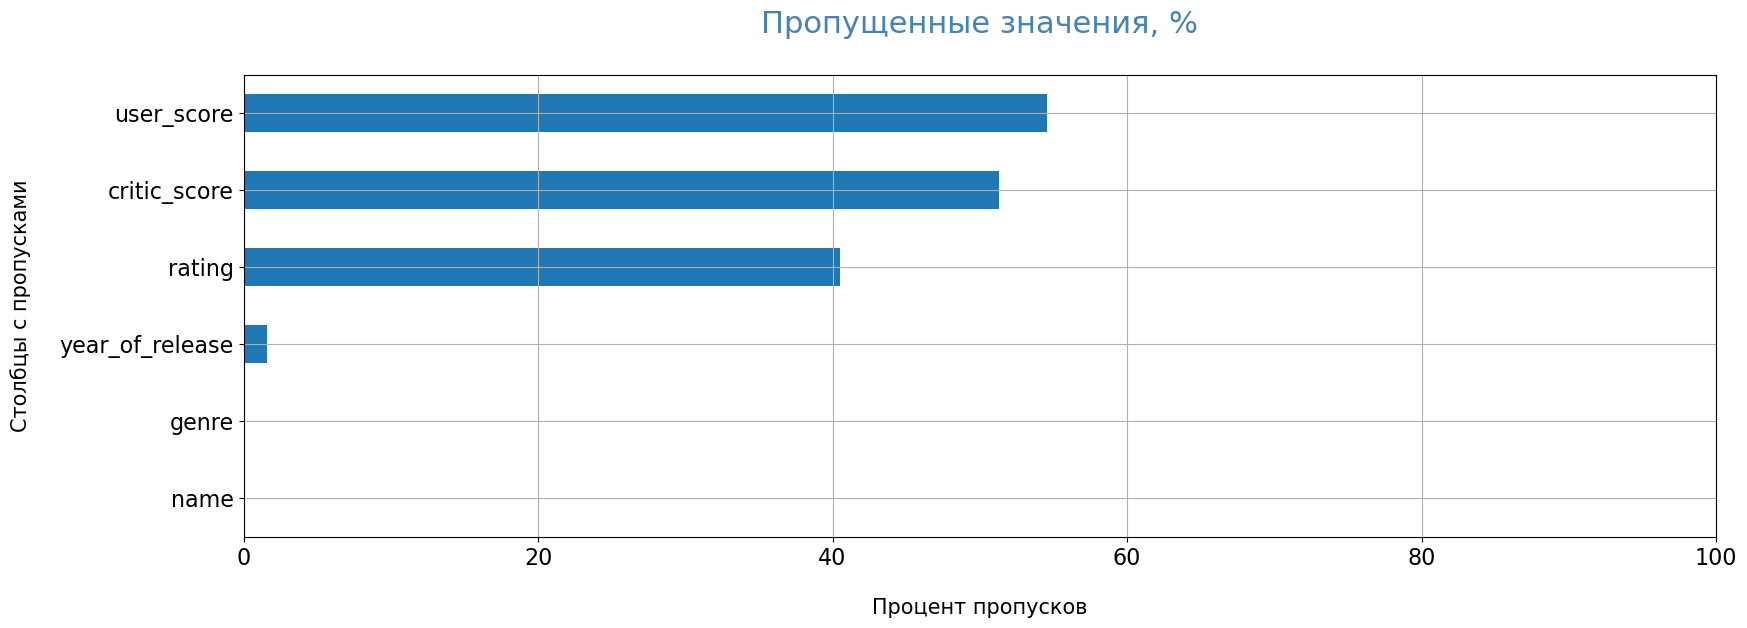

In [18]:
pass_value_barh(games_data)

В `6` столбцах из `11` присутствуют пропуски:

`user_score`: `9125` пропусков. Почти `55`% игр не имеют информацию о оценке пользователей. Пропуски оставляем.

`critic_score`: `8578` пропусков. Почти `50`% игр не имеют информацию о оценке критиков. Пропуски оставляем.

`rating`: `6766` пропусков. Почти `50`% игр не имеют информацию о оценке от организации ESRB. Их стоит заменить особым значением, например `unknown`, чтобы при составлении портрета пользователя не потерять эти данные.

`year_of_release`: `269` пропусков. Пропущенные значения удалим (`269` строк данных никак не повлияют на результат исследования (1,6% данных)).

`name` и `genre`: `2` пропуска. Причем в одних и тех же строках. Пропущенные значения удалим.   

Пропуски могли возникнуть по многим причинам, например: невелся опрос с оценкой игры, игра не популярна и ее никто не оценивал, техничская ошибка и прочее.

In [19]:
games_data = games_data.dropna(subset = ['name'])

In [20]:
games_data = games_data.dropna(subset = ['year_of_release'])

In [21]:
games_data['rating'] = games_data['rating'].fillna('unknown')

### Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец `total_sales`:

In [22]:
games_data['total_sales'] = games_data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [23]:
games_data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16444, dtype: float64

### Проверим данные на наличия явных дубликатов:

In [24]:
if games_data.duplicated().sum() == 0:
    print('Явных дубликатов нет')
else:
    games_data.duplicated().sum()

Явных дубликатов нет


### Вывод после предобработки данных:

Подготовили данные к анализу, а именно:
- Заменили названия столбцов (привели к нижнему регистру);
- Преобразовали данные в нужные типы. Описали, в каких столбцах заменили тип данных и почему;
- Обработали пропуски по возможности:
    - Объяснили, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Описали причины, которые могли привести к пропускам;
- Обратили внимание на аббревиатуру `'tbd'` в столбце с оценкой пользователей. Отдельно разобрали это значение и описали, как его обработать;
- Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец;
- Проверили данные на наличие явных дубликатов.

По данным можно отметить следующие выводы:
- В `6` столбцах из `11` присутствовали пропуски;
- Получили много пропусков в столбцах `user_score`, `critic_score`, `rating`(около `50` % данных). С ними мы пока ничего не можем сделать, потому что игры могут быть новыми, которые не успели оценить критики и пользователи. Эти данные нельзя просто так отбросить;
- Явных дубликатов в данных нет.

## Проведем исследовательский анализ данных:

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Построим гистограмму распределения выпускаемых игр в год:

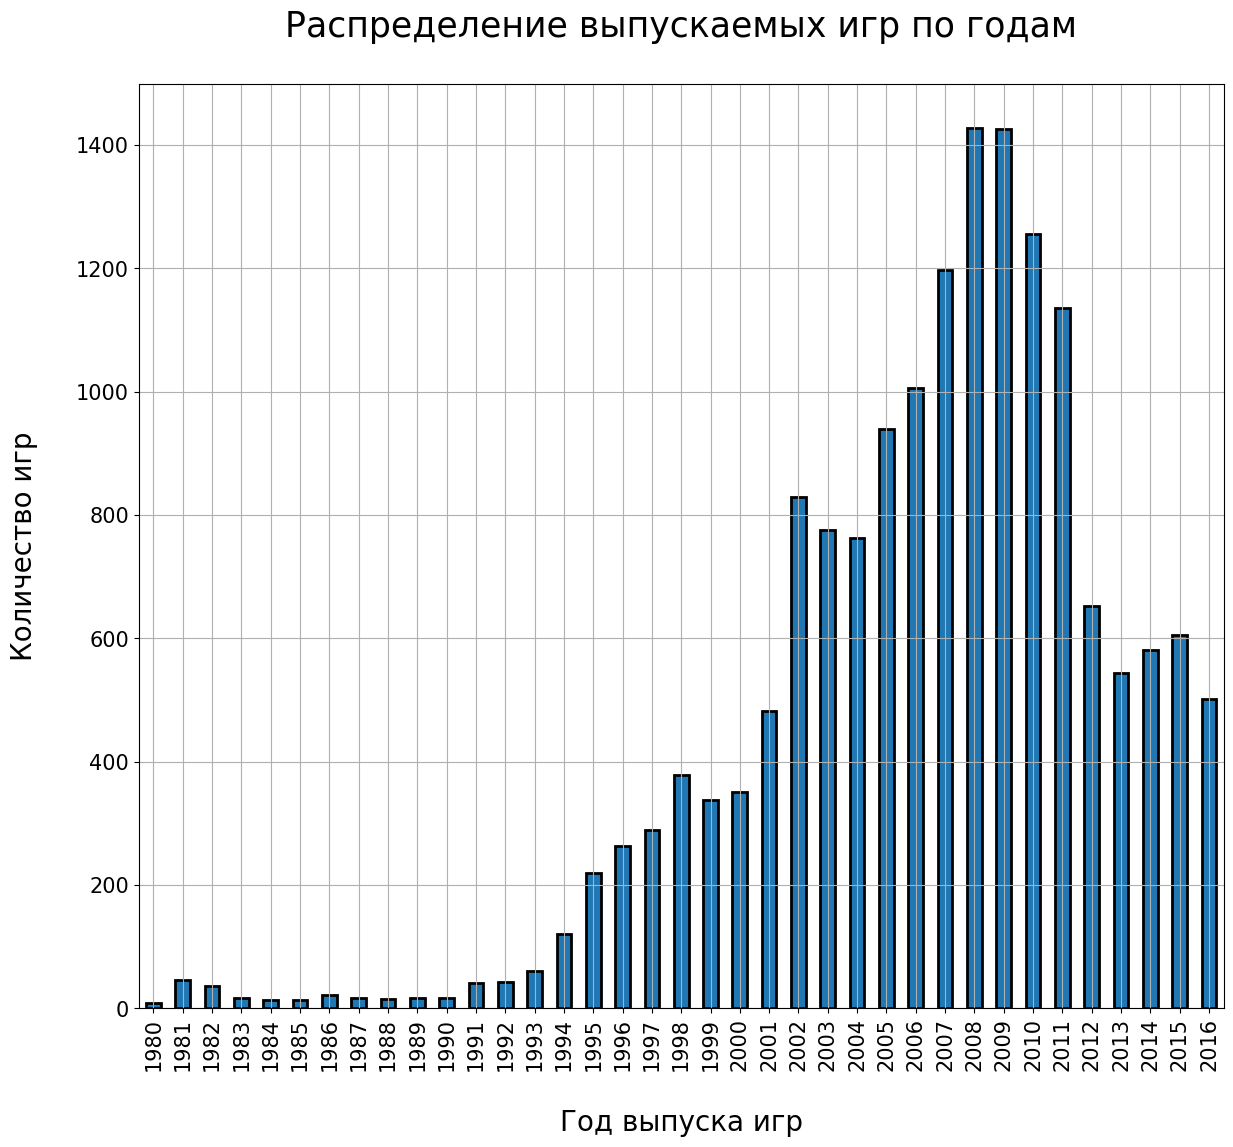

In [25]:
games_data['year_of_release'].value_counts().sort_index().plot(kind = 'bar', 
    figsize = (14,12), 
    edgecolor='black', 
    legend = False, 
    fontsize = 15,
    linewidth = 2
    ).set_title('Распределение выпускаемых игр по годам' + "\n", fontsize = 25);
plt.grid()
plt.xlabel("\n" + 'Год выпуска игр', size=20)
plt.ylabel('Количество игр' + "\n", size = 20);

На графике мы видим, что до `1994` года кол-во игр было малым, это может быть связано с тем, что мощности, ОС не позволяли придумывать много игр, да и не для игр создавалась на тот момент ЭВМ, также компьютеры были далеко не у всех. Резкий скачок по количеству игр, выпущенных в год, произошел в `2002` году. Пик - `2008-2009` года. После этого начался спад, связанный скорее всего с развитием мобильных устройств и интеграции социальных сетей в жизнь людей. Это всё привело к тому, что интерес к самим играм упал, соответственно, упало и их производство.

Полагаем, что данные до явного роста (`1994`г.) нам не интересны.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [26]:
top_five_platform = games_data.groupby('platform').agg({'total_sales': 'sum'}) \
.sort_values(by='total_sales', ascending=False).head(5)

In [27]:
top_five_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


In [28]:
top_five_platform_index = top_five_platform.index.unique()

In [29]:
games_data_top_five = games_data.loc[games_data['platform'].isin(list(top_five_platform_index))]

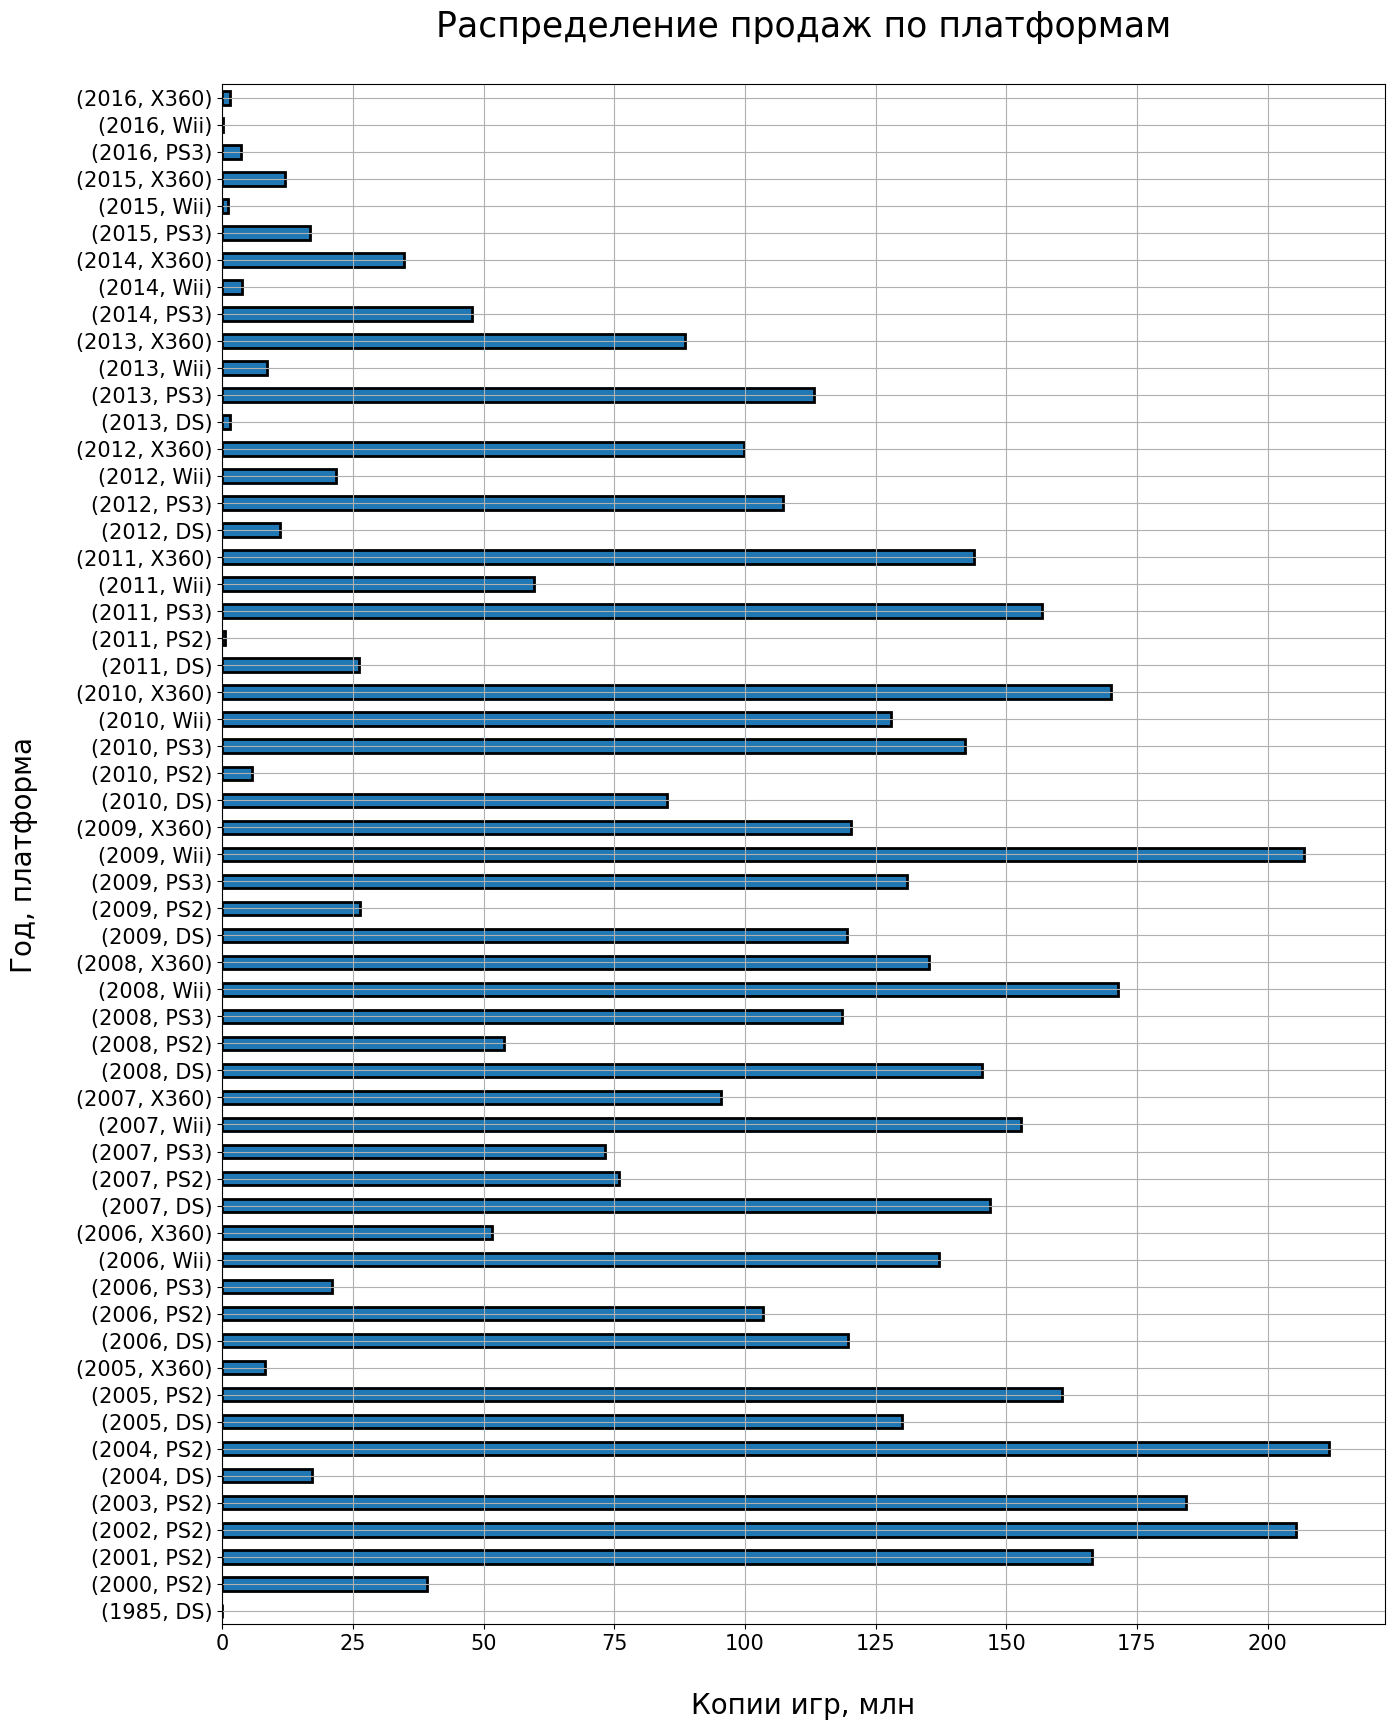

In [30]:
games_data_top_five.groupby(['year_of_release', 'platform']).agg({'total_sales': 'sum'}).sort_index().plot(kind = 'barh', 
    figsize = (15,20), 
    edgecolor='black',  
    fontsize = 15,
    legend = False,
    linewidth = 2
    ).set_title('Распределение продаж по платформам' + "\n", fontsize = 25);
plt.grid()
plt.xlabel("\n" + 'Копии игр, млн', size=20)
plt.ylabel('Год, платформа' + "\n", size = 20);

Лидером является платформа PS2. Она имела популярность в данные годы. Далее идут Xbox360, PS3, Wii и DS. 

Можно заметить, что каждая из платформ 'прожила' примерно по `10` лет:
- PS2 с `2000` по `2010` (в точности `10` лет)
- DS с `2004` по `2013` (`9` лет)
- X360 с `2006` по `2015` (`9` лет)
- Wii 2006 - `2016` (`10` лет)
- PS3 2006 - `2016` (`10` лет)

### Необходимо выбрать актуальный период - период, за который мы будем оценивать наши данные, на основании выводов по которым будем строить предсказательные модели на 2017 год.

Многие новые платформы ,на тот период, появляются в 2006 году (например: Wii, PS3, X360), при этом характерный срок жизни - это 10 лет, но к 2013 году мы видим их активный спад, к тому видим рост актуальных на нынешнее время платформ, их в дальнейшем мы и будем разбирать. Таким образом на мой взгляд актульные данные начинаются с 2013 года.

In [31]:
games_data_over_2013 = games_data.query('year_of_release >= 2013')

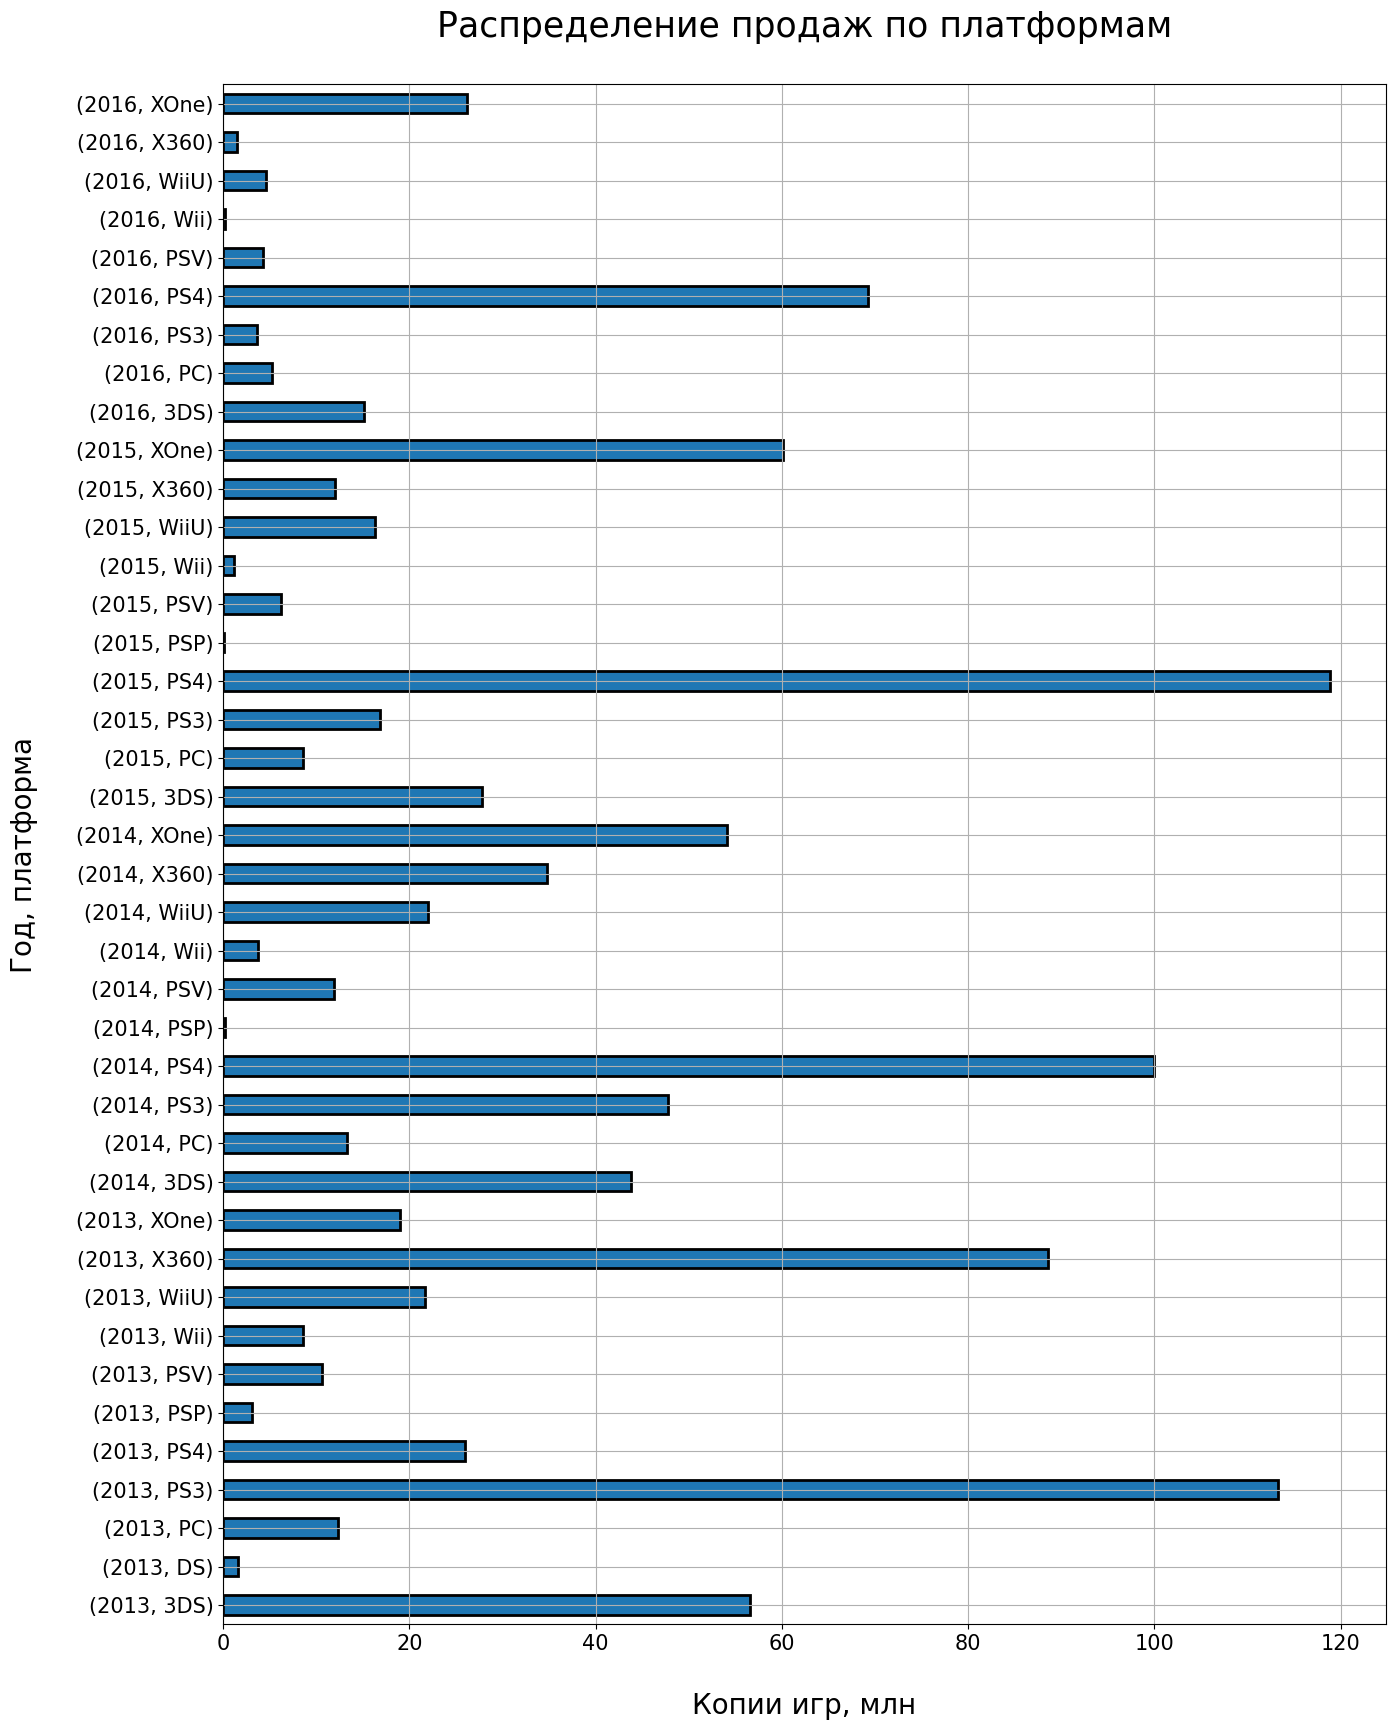

In [32]:
games_data_over_2013.groupby(['year_of_release', 'platform']).agg({'total_sales': 'sum'}).sort_index().plot(kind = 'barh', 
    figsize = (15,20), 
    edgecolor='black',  
    fontsize = 15,
    legend = False,
    linewidth = 2
    ).set_title('Распределение продаж по платформам' + "\n", fontsize = 25);
plt.grid()
plt.xlabel("\n" + 'Копии игр, млн', size=20)
plt.ylabel('Год, платформа' + "\n", size = 20);

На графике можно видеть общую тенденцию снижения продаж. Среди них игры на PS4 и XOne продаются гораздо чаще. PS4 и XOne являются потенциально прибыльными, также PC, потому что показывает хоть небольшие, но стабильные продажи. Падает спрос на консоли: X360, PS3.

Итого потенциально прибыльные:

PC, PS4, XOne

Потенциально не будут продаваться:

X360, PS3




### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

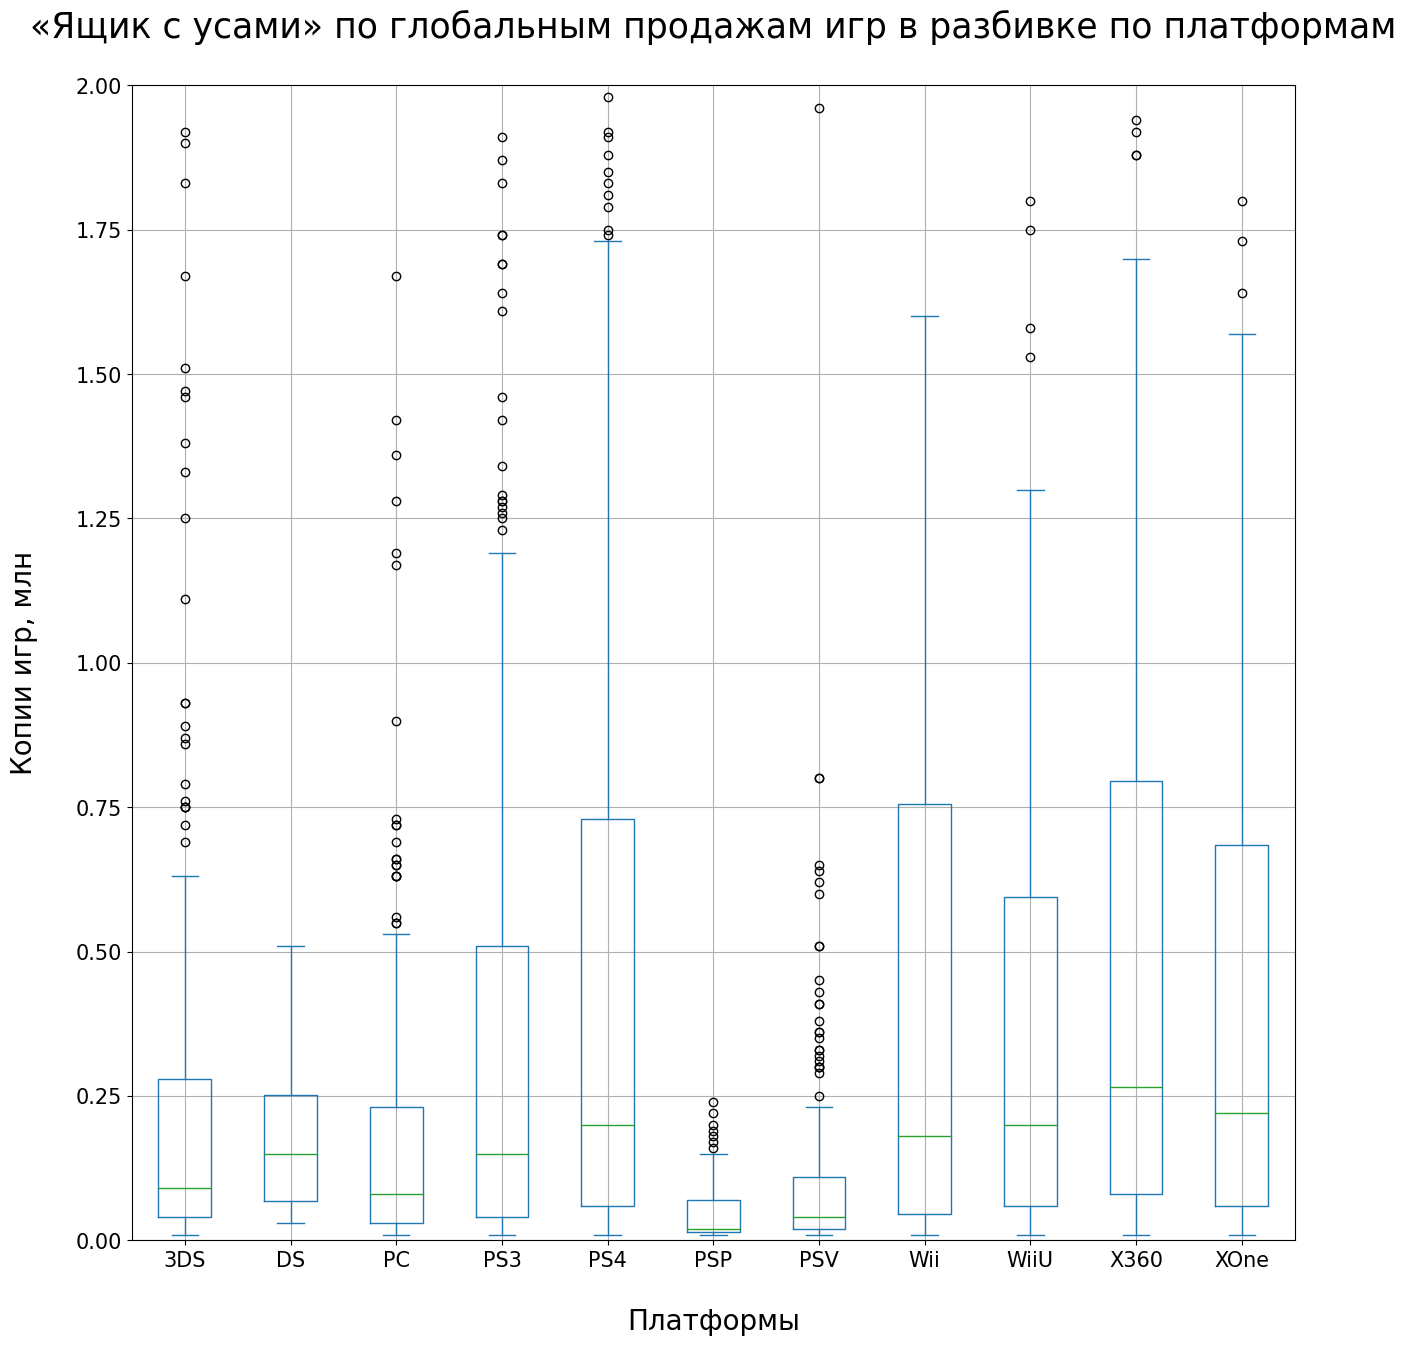

In [33]:
games_data_over_2013.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box',
    ylim=(0,2),
    figsize = (15,15),   
    fontsize = 15,
    legend = False,
    ).set_title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам' + "\n", fontsize = 25);
plt.grid()
plt.xlabel("\n" + 'Платформы', size=20)
plt.ylabel('Копии игр, млн' + "\n", size = 20);

Наибольшие медианные продажи у платформ WiiU, XOne, X360 и PS4;
Положение Xbox One и PlayStation 4 можно объяснить тем, что данные приставки позднее остальных вышли на рынки.
Почти у всех платформ есть много выбросов - скорее всего это игры которые многим понравились, раздавались беслпатно и пр.
Компьютерные игры (PC) стоят дешевле консольных.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
В качесве популярной платформы я выбрал PS4.

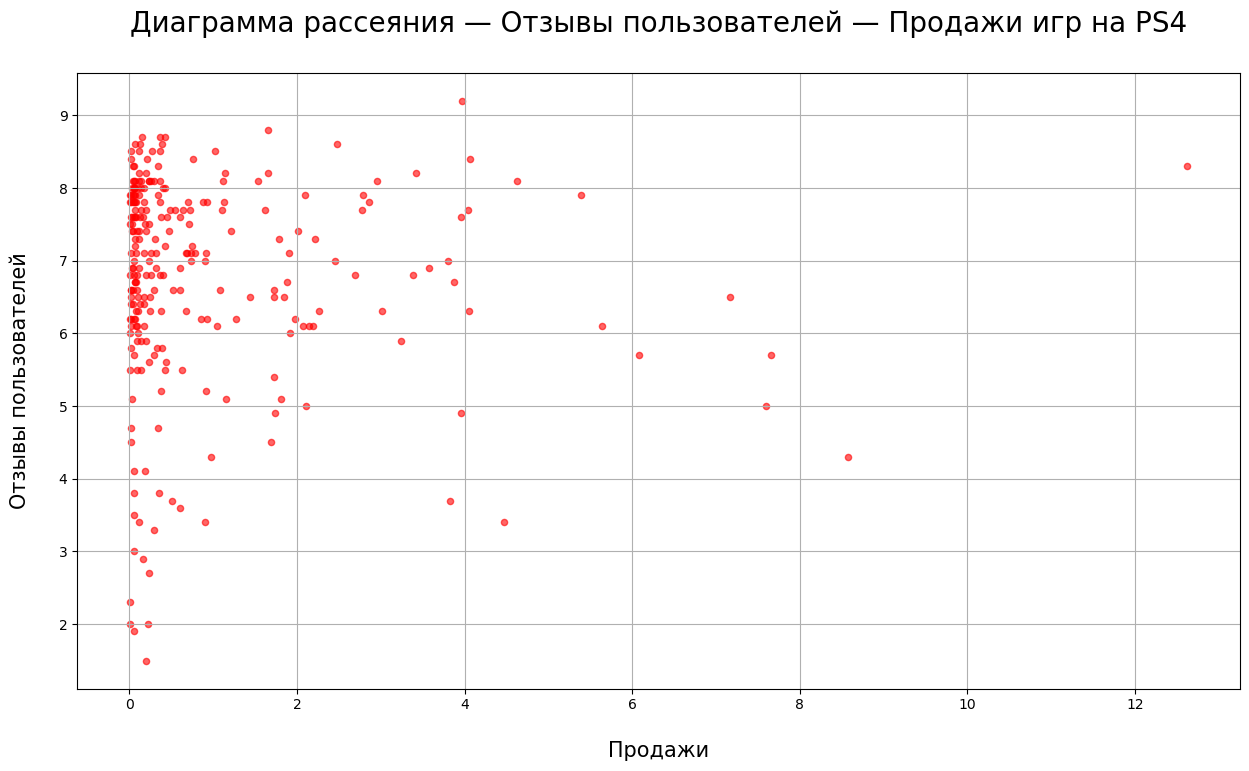

In [34]:
games_data_over_2013[games_data_over_2013.platform == 'PS4'].plot(kind='scatter', 
        y='user_score' , x='total_sales', alpha=0.6, figsize=(15,8), c = 'r', s = 20)
plt.title('Диаграмма рассеяния — Отзывы пользователей — Продажи игр на PS4' + "\n", size=20);
plt.grid()
plt.xlabel("\n" + 'Продажи', size=15)
plt.ylabel('Отзывы пользователей' + "\n", size = 15);       

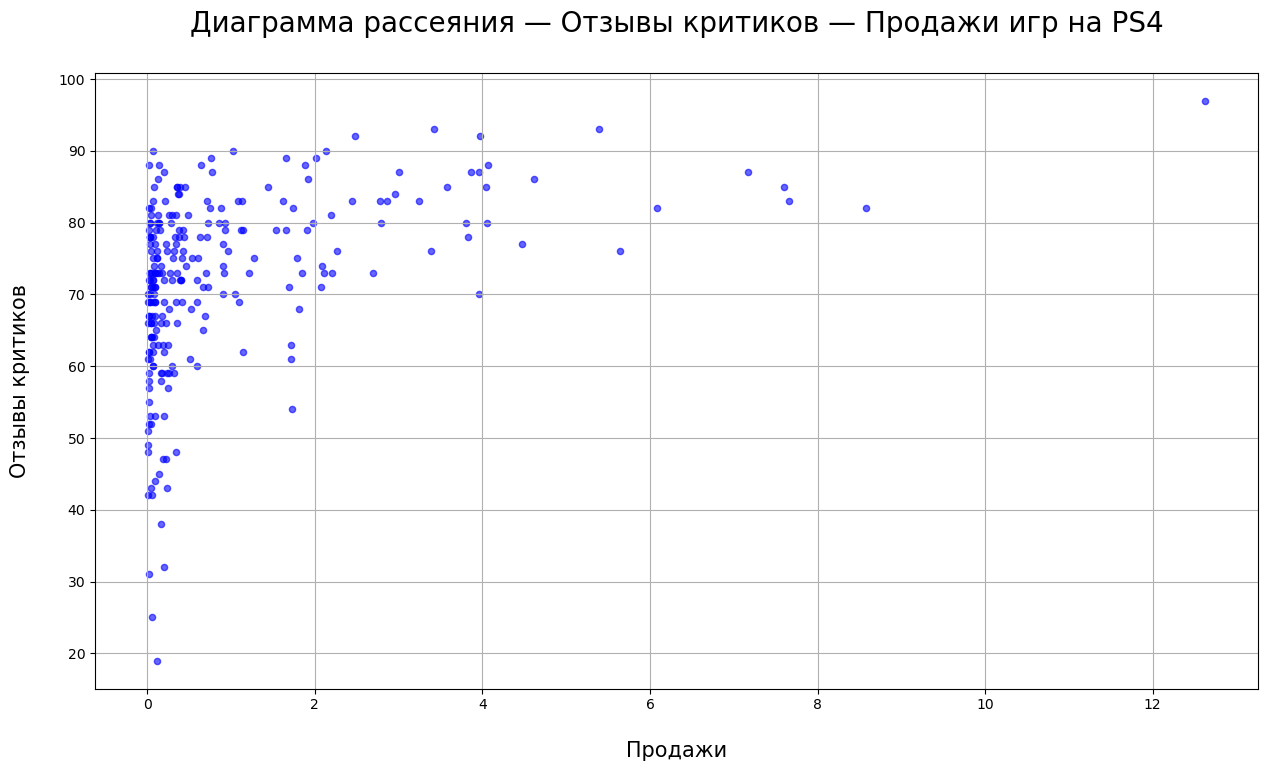

In [35]:
games_data_over_2013[games_data_over_2013.platform == 'PS4'].plot(kind='scatter', 
        y='critic_score' , x='total_sales', alpha=0.6, figsize=(15,8), c = 'b', s = 20)
plt.title('Диаграмма рассеяния — Отзывы критиков — Продажи игр на PS4' + "\n", size=20);
plt.grid()
plt.xlabel("\n" + 'Продажи', size=15)
plt.ylabel('Отзывы критиков' + "\n", size = 15);  

In [36]:
PS4_data = games_data_over_2013[games_data_over_2013.platform == 'PS4']

In [37]:
PS4_data = PS4_data[['critic_score','user_score', 'total_sales']]

In [39]:
PS4_data.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


В целом видим закономерную картину, чем лучше рейтинг, тем игра лучше, следовательно больше продаж, но есть и "аномалии" - есть игры, которые имеют высокую оценку пользователей, но при этом мало продались

Корреляция между total_sales и critic_score равна 0.4.

Корреляции между total_sales и user_score нет.

In [40]:
top_platforms_over_2013 = ['XOne','PC','WiiU','3DS', 'PSV']

In [41]:
for platform in top_platforms_over_2013:
    platform_data = games_data_over_2013[games_data_over_2013.platform == platform]
    platform_data = platform_data[['critic_score','user_score', 'total_sales']]
    print("\n" + f'Матрица корреляции для {platform}')
    print(platform_data.corr())
    critic_score = round(platform_data.corr()['critic_score'][2], 2)
    user_score = round(platform_data.corr()['user_score'][2], 2)
    if critic_score >= 0.4:
        print("\n" + f'Корреляция для {platform} между total_sales и critic_score равна {critic_score}.')
    else:
        print("\n" + f'Корреляции для {platform} между total_sales и critic_score нет.')
    if user_score >= 0.4:
        print("\n" + f'Корреляция для {platform} между total_sales и user_score равна {critic_score}.')
    else:
        print("\n" + f'Корреляции для {platform} между total_sales и user_score нет.')


Матрица корреляции для XOne
              critic_score  user_score  total_sales
critic_score      1.000000    0.472462     0.416998
user_score        0.472462    1.000000    -0.068925
total_sales       0.416998   -0.068925     1.000000

Корреляция для XOne между total_sales и critic_score равна 0.42.

Корреляции для XOne между total_sales и user_score нет.

Матрица корреляции для PC
              critic_score  user_score  total_sales
critic_score      1.000000    0.429562     0.196030
user_score        0.429562    1.000000    -0.093842
total_sales       0.196030   -0.093842     1.000000

Корреляции для PC между total_sales и critic_score нет.

Корреляции для PC между total_sales и user_score нет.

Матрица корреляции для WiiU
              critic_score  user_score  total_sales
critic_score      1.000000    0.721313     0.376415
user_score        0.721313    1.000000     0.419330
total_sales       0.376415    0.419330     1.000000

Корреляции для WiiU между total_sales и critic_score не

По убыванию корреляции(оценка критиков)--> XOne, PS4,WiiU, 3DS, PSV,PC. 

По убыванию корреляции(оценка пользователей) почти нет связи за исключением WiiU, 3DS. 

В целом корреляция между этими данными не просматривается отчетливо.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [42]:
games_data_over_2013.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median') \
.sort_values(ascending=False, by = 'total_sales')

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


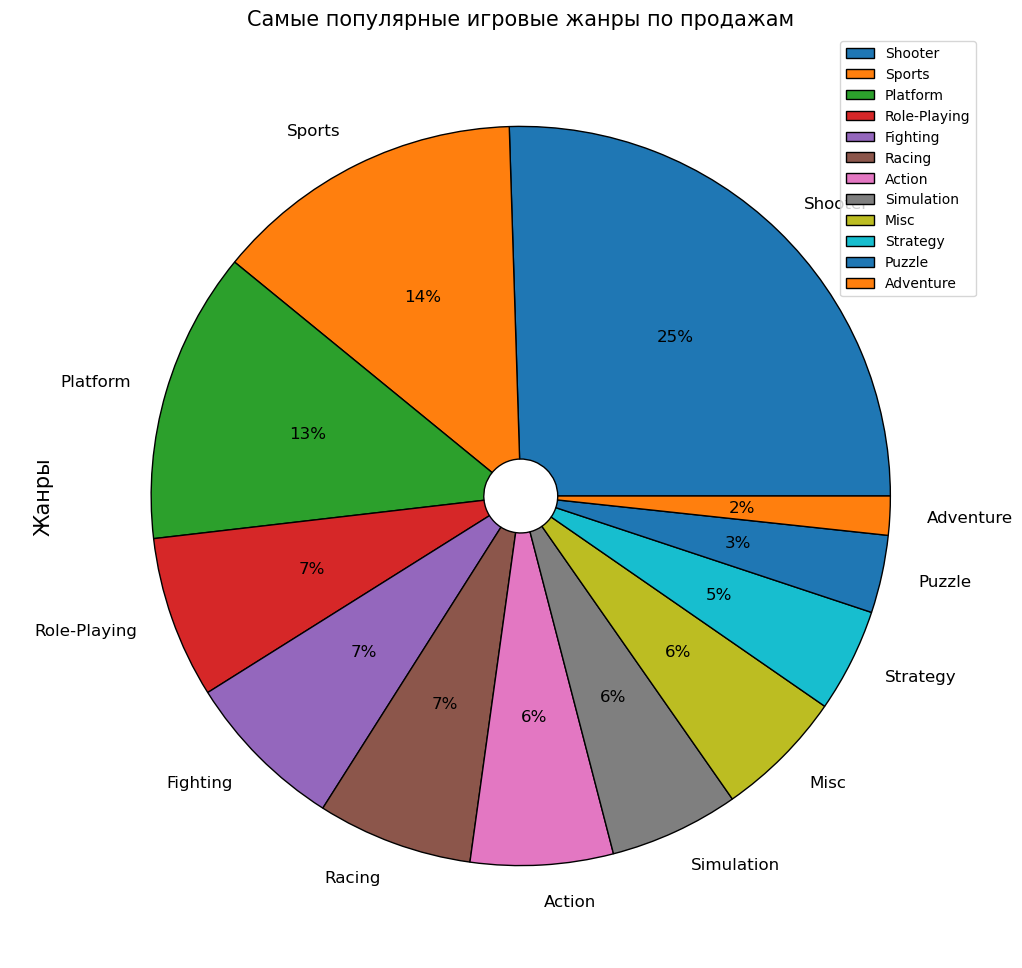

In [43]:
games_data_over_2013.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median') \
.sort_values(ascending=False, by = 'total_sales').plot(kind='pie', 
    figsize=(12,12),
    subplots=True,
    fontsize = 12,
    autopct='%.0f%%', 
    wedgeprops=dict(width=0.9, edgecolor='black'));
plt.title('Cамые популярные игровые жанры по продажам', size=15);
plt.legend(loc='upper right');
plt.ylabel("\n" + 'Жанры', size=15);

Самые прибыльные жанры - Shooter, Sports, Platform

Наименее прибыльные жанры - Adventure, Puzzle, Strategy

### Вывод после исследовательского анализа данных:

Больше всего покупают игры жанра Action, возможно, это связано с тем, что игр данного жанра выпускается больше всех остальных. 

Sports идёт на втором месте и по количеству выпускаемых игр и по продажам. 

Shooter неожиданно стоит на третьем месте по продажам, хотя игр производится почти в два раза меньше. 

Adventure сильно отстаёт по продажам, хотя игр выпускается много.

## Составим портрет пользователя каждого региона:

### Определим для пользователя каждого региона (NA, EU, JP):
#### Самые популярные платформы (топ-5):

In [44]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

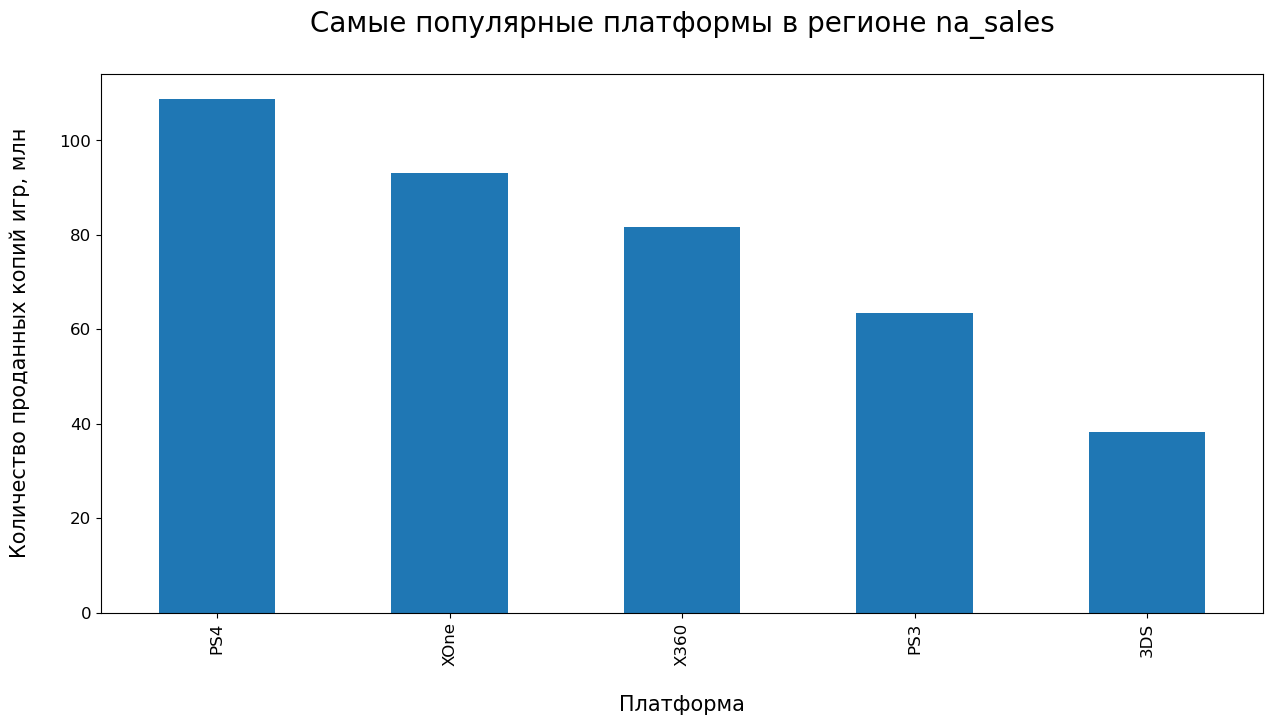

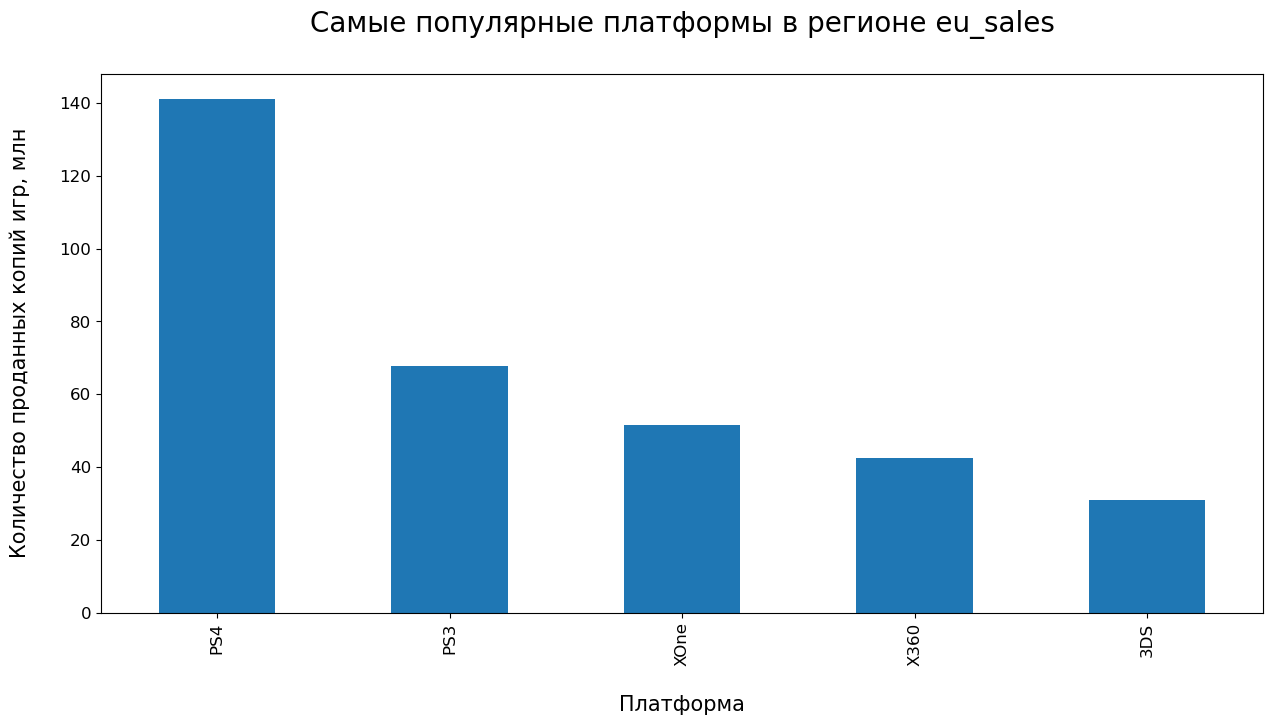

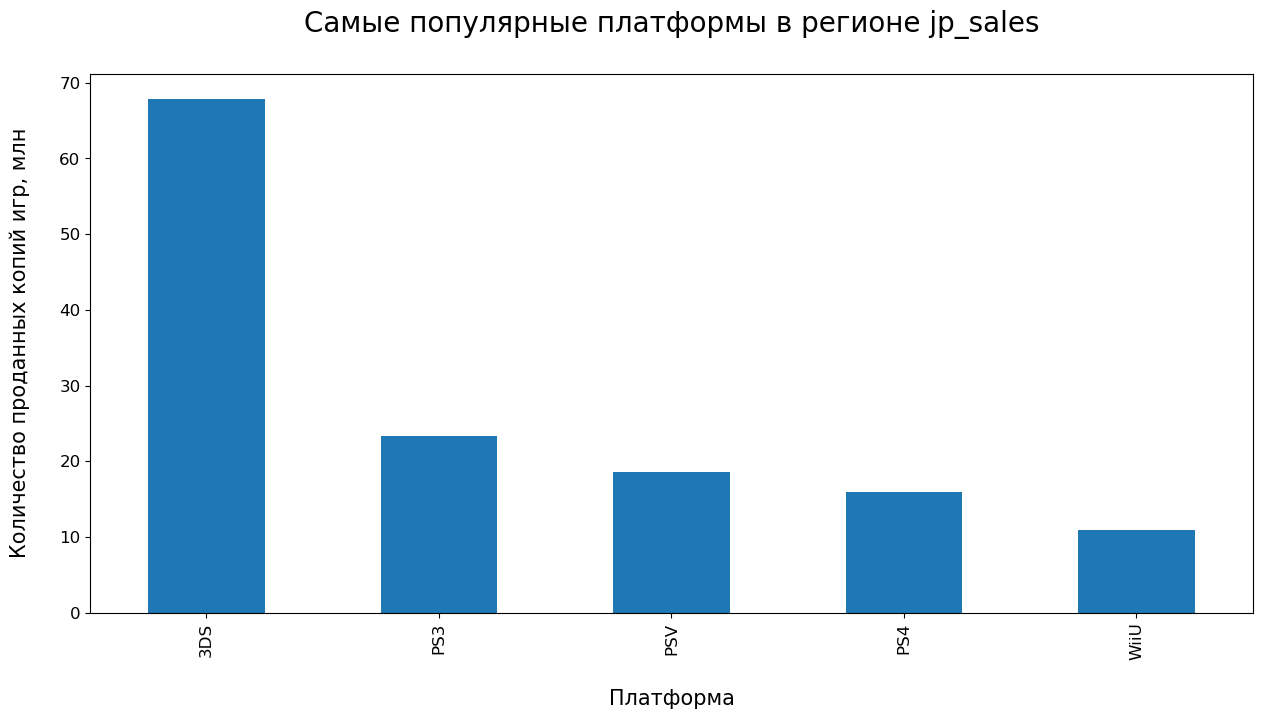

In [45]:
for region in regions:
    games_data_over_2013.pivot_table(index = 'platform', values = region, aggfunc = 'sum') \
    .sort_values(ascending=False, by = region).head().plot(kind = 'bar', figsize=(15,7), fontsize = 12, legend = False,)
    plt.title(f'Самые популярные платформы в регионе {region}' + "\n", size=20);
    plt.xlabel("\n" + 'Платформа', size=15);
    plt.ylabel('Количество проданных копий игр, млн' + "\n", size = 15);

Пользователи Северной Америки больше всего предпочитают Xbox360, потому что консоль американская. Платформы Wii, PS3, DS - пользуются также значительной популярностью. В сумме продаж преобладают игры на японских консолях.

У пользователей Европы популярны и японские платформы, и американская консоль Xbox360. В целом запросы такие же как у пользователей из Северной Америки.

Подавляющее большинство японских пользователей играют в японские платформы.

#### Самые популярные жанры (топ-5):

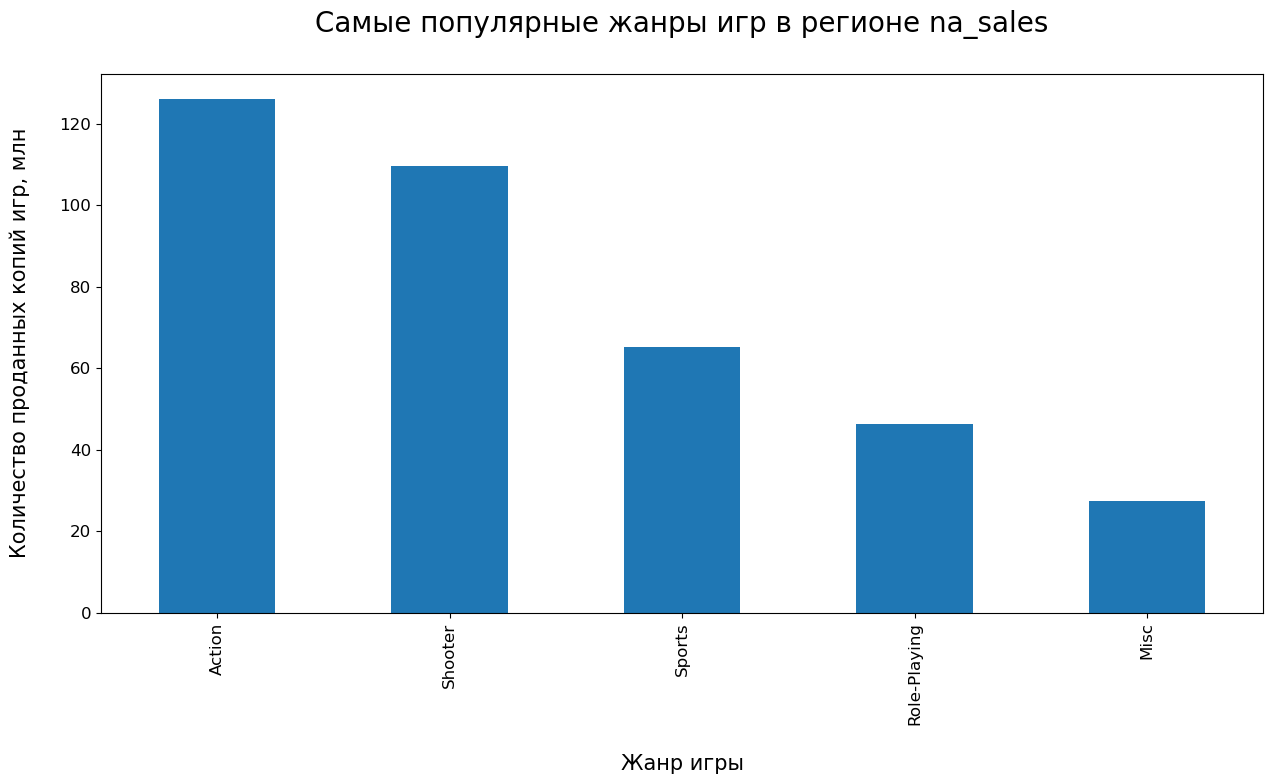

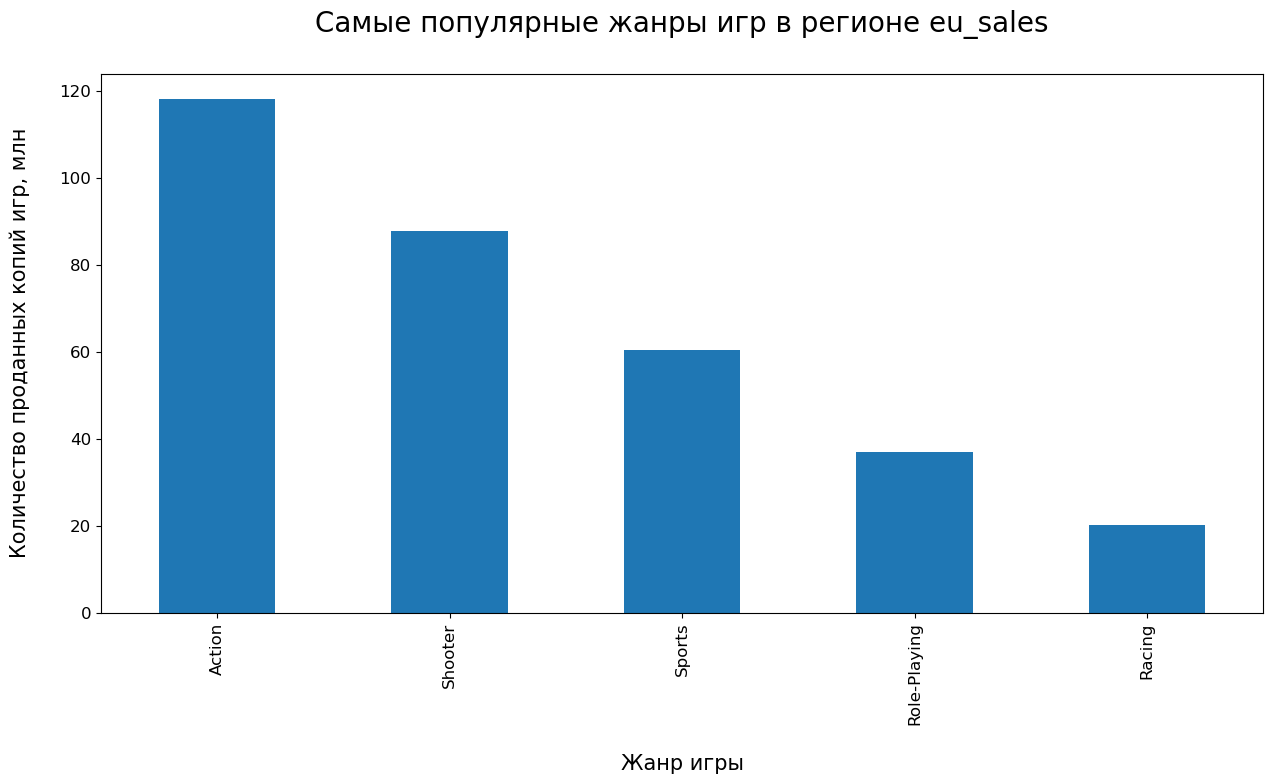

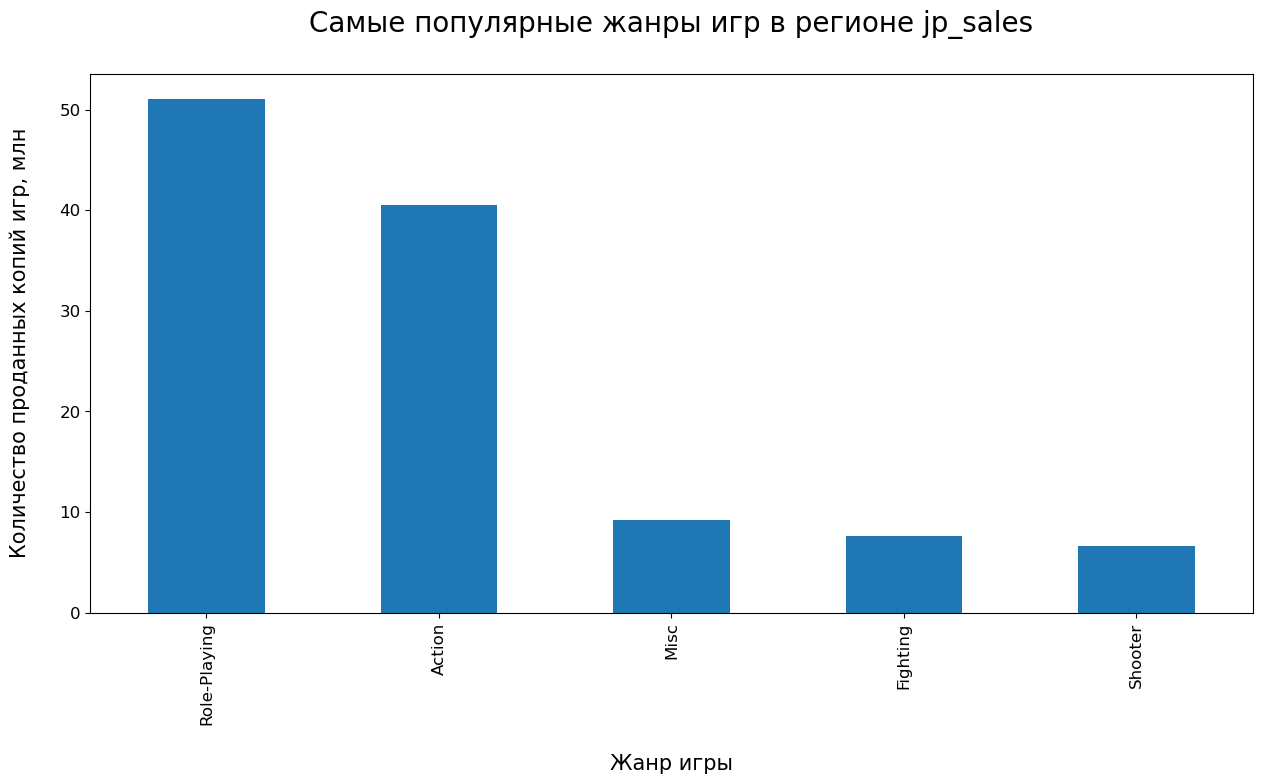

In [46]:
for region in regions:
    games_data_over_2013.pivot_table(index = 'genre', values = region, aggfunc = 'sum') \
    .sort_values(ascending=False, by = region).head().plot(kind = 'bar', figsize=(15,7), fontsize = 12, legend = False,)
    plt.title(f'Самые популярные жанры игр в регионе {region}' + "\n", size=20);
    plt.xlabel("\n" + 'Жанр игры', size=15);
    plt.ylabel('Количество проданных копий игр, млн' + "\n", size = 15);

Пользователи Европы и Северной Америки играют в целом в популярны жанры - `Action`, `Sports`, `Shooter`.

В японии преобладают пользователи предпочитают жанр - `Role-Playing`, `Action` и редко играют в игры с жанром - `Shooter`.

Пользователи Европы и Северной Америки играют в целом в одни и те же консоли и игровая индустрия больше развита, поэтому популярны жанры - Action, Sports, Shooter. 

В японии преобладают пользователи с портативными консолями, в которые можно играть не только дома, поэтому они предпочитают жанр - Role-Playing и редко играют в игры с жанром - Shooter.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [47]:
games_data_over_2013.groupby('rating').agg({'na_sales': sum, 'eu_sales': sum, 'jp_sales': sum})

,na_sales,eu_sales,jp_sales
rating,,,
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
T,49.79,41.95,20.59
unknown,89.42,78.91,85.05


Явно подтвердить влияние рейтинга ESRB на продажи в регионах не получается, но некоторые закономерности прослеживаются.
Основная доля приходится на игры с рейтингом M Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.

## Проверки гипотез:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

$H_{0}$: Средние пользовательские рейтинги платформ Xbox One и PC равны

$H_{1}$: Средние пользовательские рейтинги платформ Xbox One и PC не равны

Пороговое значение `alpha = 0.05`

In [48]:
XOne = games_data_over_2013[(games_data_over_2013['platform'] == 'XOne') & \
                            (games_data_over_2013['user_score'] > 0)]['user_score']
PC = games_data_over_2013[(games_data_over_2013['platform'] == 'PC') & \
                          (games_data_over_2013['user_score'] > 0)]['user_score']

In [49]:
alpha = .05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:

$H_{0}$: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны

$H_{1}$: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны

Пороговое значение `alpha = 0.05`

In [50]:
Action = games_data_over_2013[(games_data_over_2013['genre'] == 'Action') &  \
                     (games_data_over_2013['user_score'] > 0)]['user_score']
Sports = games_data_over_2013[(games_data_over_2013['genre'] == 'Sports') &  \
                     (games_data_over_2013['user_score'] > 0)]['user_score']

In [51]:
alpha = .05

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704318e-20
Отвергаем нулевую гипотезу


## Общий вывод:

В работе были выполнены следующие шаги и сделаны выводы:
1. Загрузили данные.
2. Подготовили данные к анализу: 
    - Заменили названия столбцов (привели к нижнему регистру);
    - Ознакомились с данными, посмотрели на общую информацию о датасете, выявили пропуски и не соответствие типов данных;
    - Обработали пропуски по возможности:
        - На данном шаге мы заполнили некоторые пропуски, обнаружили необычное значени tbd - "to be determined" и заменили это значение на NaN.
    - Опишисали причины, которые могли привести к пропускам;
    - Обратить внимание на аббревиатуру `tbd` в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
    - Посчитали общее количество продаж по всем регионам и записали результат в столбец `total_sales`.
    
3. Провели исследовательский анализ данных:
    - Ответили на ряд вопросов:
        - Было обнаружено, что рост выпуска игр приходится на `1994` год, а пик на `2008-2009` гг.
        - Характерный срок жизни платформы - `10` лет, поэтому оставим данные с `2013` по `2016` гг.
        - `3` потенциально прибыльных платформ - `PS4`, `XOne`, `3DS`.
        - Наибольшие медианные продажи у платформ `X360` и `PS3`.
        - Почти у всех платформ есть определенные игры, которые "выстрелили".
        - Компьютерные игры `PC` стоят дешевле консольных.
        - Больше всего игр жанра `Action`, затем идут `Sports`, `misc` и `adventure`.
        - Лучше всего покупают игры жанра `Action`, `Sports` идёт на втором месте, `Shooter` неожиданно стоит на третьем месте по продажам, но при этом самый выгодный.
        - `Adventure` сильно отстаёт по продажам, хотя игр выпускается много.
    
4. Составили портрет пользователя каждого региона:

    - В `NA` самая популярная платформа `X360`. Европейцы предпочитают `PS3`. В Японии популярны `DS`.
    - В `NA` и `EU` самые популярные жанры практически совпадают. В `JP` вкусы отличаются.
    
5. Проверили гипотезы:

Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые. Гипотеза не подтвердилась.
Средние пользовательские рейтинги жанров `Action` и `Sports` разные. Гипотеза подтвердилась!.